In [4]:
import dreamer as dm
import numpy as np
import sys
import os
import torch
import matplotlib.pyplot as plt

import gymnasium as gym
from importlib import reload
import time
from tqdm import tqdm

sys.path.append(os.path.abspath('../hockey_env/hockey'))
import hockey_env as h_env


In [14]:

env = h_env.HockeyEnv()

d = dm.DreamerV3(
	env=env,
    obs_dim=env.observation_space.shape[0],
    action_dim=env.action_space.shape[0] // 2,
    latent_dim=8,
    latent_categories_size=32,
    model_dim=256,
    imagination_horizon=15)

replay_ratio = 3200
number_of_training_steps = 1000
batch_size = 32
number_of_trajectories = 1
max_steps = 100

losses = []
for step in range(number_of_training_steps):
    d.generate_trajectories(number_of_trajectories,max_steps)

    for _ in range(replay_ratio * number_of_trajectories * max_steps // batch_size):
        loss = d.train(batch_size)
        losses.append(loss)
        print(f"Step {step} Loss: {loss}")


Step 0 Loss: 6.636325836181641
Step 0 Loss: 4.547894477844238
Step 0 Loss: 3.357950448989868
Step 0 Loss: 3.6433939933776855
Step 0 Loss: 2.989323139190674
Step 0 Loss: 2.8681836128234863
Step 0 Loss: 2.3604557514190674
Step 0 Loss: 3.323962926864624
Step 0 Loss: 4.372046947479248
Step 0 Loss: 4.157834529876709
Step 0 Loss: 3.5573832988739014
Step 0 Loss: 2.0038647651672363
Step 0 Loss: 2.8020286560058594
Step 0 Loss: 2.6305806636810303
Step 0 Loss: 2.525247812271118
Step 0 Loss: 2.1822428703308105
Step 0 Loss: 1.531864047050476
Step 0 Loss: 2.2495381832122803
Step 0 Loss: 1.7219271659851074
Step 0 Loss: 1.596487045288086
Step 0 Loss: 1.5362334251403809
Step 0 Loss: 1.3977090120315552
Step 0 Loss: 1.6391894817352295
Step 0 Loss: 1.5977519750595093
Step 0 Loss: 0.9131596088409424
Step 0 Loss: 1.401651382446289
Step 0 Loss: 1.199601650238037
Step 0 Loss: 1.1845207214355469
Step 0 Loss: 0.8611408472061157
Step 0 Loss: 1.1600849628448486
Step 0 Loss: 0.7681677341461182
Step 0 Loss: 1.12067

KeyboardInterrupt: 

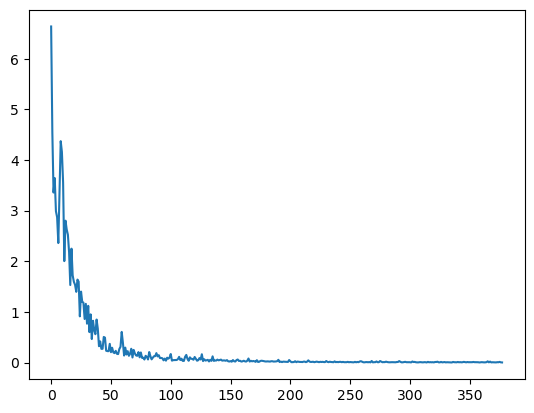

In [15]:
# Plot the losses
plt.plot(losses)
plt.show()